In [3]:
import pandas as pd
import numpy as np

# Load Tesla stock data (assuming data is in a CSV file)
df = pd.read_csv('../data/raw/TSLA_data.csv', parse_dates=['Date'], index_col='Date')

# Visualize the first few rows
df.head()

# Handle missing values (if any)
df = df.fillna(method='ffill')  # Forward fill missing values


C:\Users\user\AppData\Local\Temp\ipykernel_28928\4080525374.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing values


## Visualize the Time Series

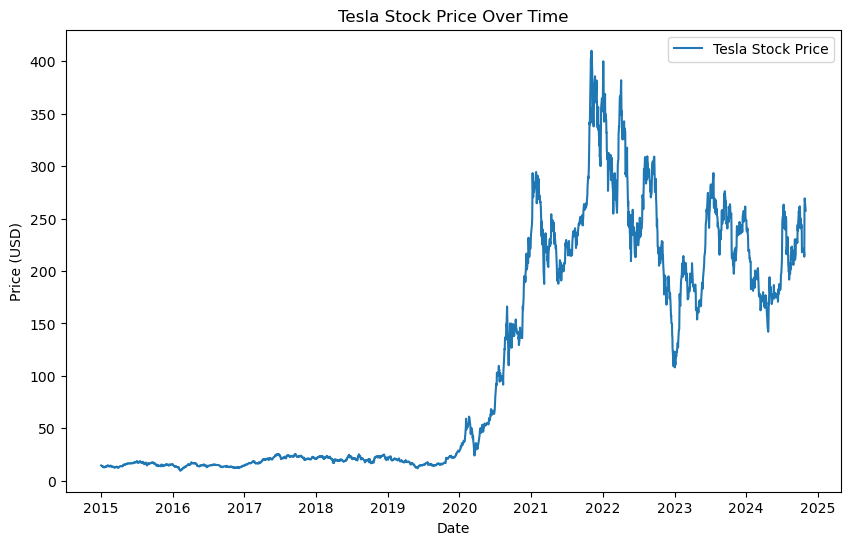

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Tesla Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Split Data into Training and Test Sets

In [5]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]


## Choose and Train the Model
### ARIMA Model

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

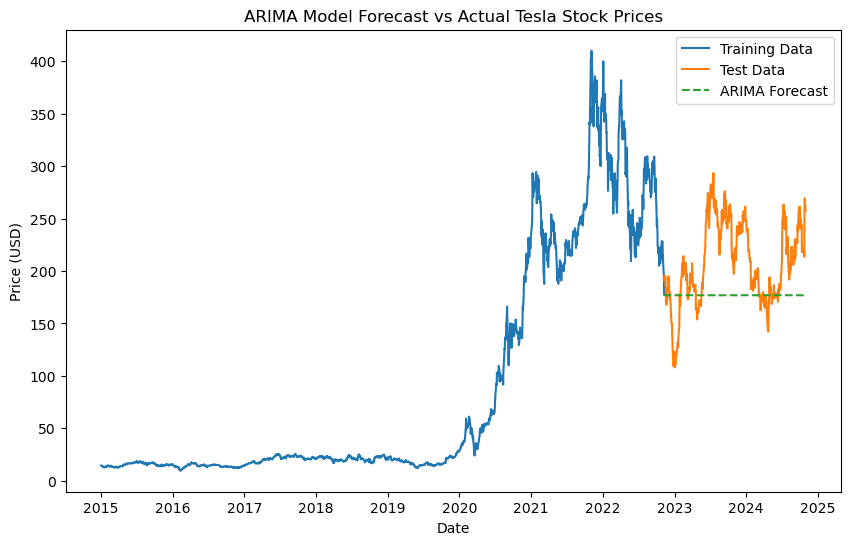

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on the training data
model = ARIMA(train_data['Close'], order=(5,1,0))  # Example order (p, d, q)
model_fit = model.fit()

# Forecast the future stock prices (for the test set period)
forecast = model_fit.forecast(steps=len(test_data))

# Plot the forecasted values vs actual test data
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## SARIMA Model

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_

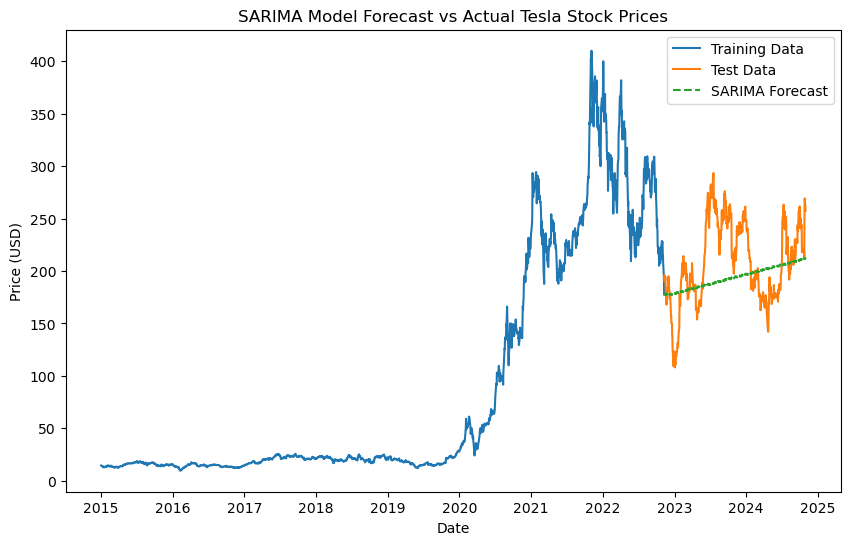

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model_sarima = SARIMAX(train_data['Close'], order=(5,1,0), seasonal_order=(1,1,1,12))  # Example seasonal_order (p,d,q,s)
model_sarima_fit = model_sarima.fit()

# Forecast for the test period
forecast_sarima = model_sarima_fit.forecast(steps=len(test_data))

# Plot results
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')
plt.plot(test_data.index, forecast_sarima, label='SARIMA Forecast', linestyle='--')
plt.title('SARIMA Model Forecast vs Actual Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Optimize Model Parameters
### Use auto_arima to optimize the parameters for ARIMA/SARIMA models automatically.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=12337.622, Time=6.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12340.889, Time=0.18 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12340.375, Time=1.70 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12340.797, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12339.337, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=12345.594, Time=4.65 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=12345.207, Time=6.41 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=12315.154, Time=26.32 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=12313.154, Time=19.50 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=12311.156, Time=15.33 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=12343.201, Time=4.74 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=12313.155, Time=21.88 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=12335.607, Time=7.34 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=12309.410, Time=9.33 sec
 

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


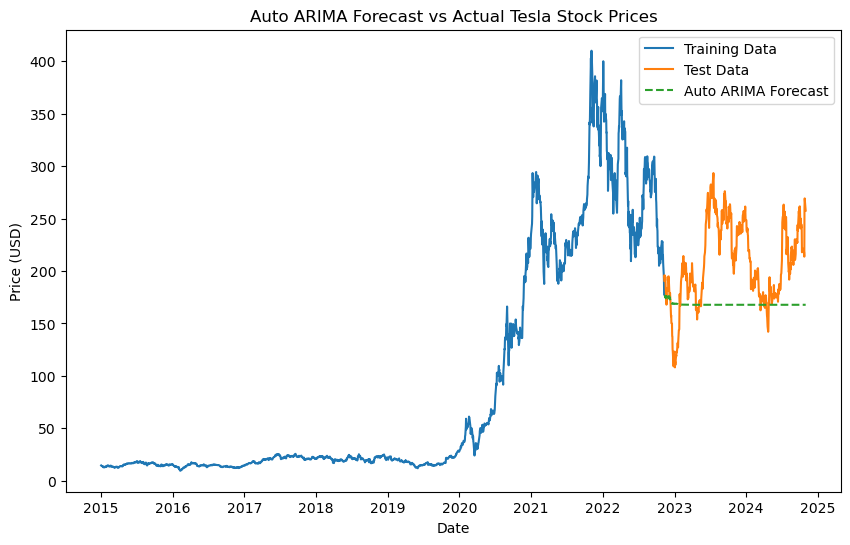

In [9]:
from pmdarima import auto_arima

# Fit the auto_arima model
auto_model = auto_arima(train_data['Close'], seasonal=True, m=12, stepwise=True, trace=True)

# Forecast using the optimized model
forecast_auto = auto_model.predict(n_periods=len(test_data))

# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')
plt.plot(test_data.index, forecast_auto, label='Auto ARIMA Forecast', linestyle='--')
plt.title('Auto ARIMA Forecast vs Actual Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


## Evaluate Model Performance
### Calculate the evaluation metrics for the model's performance

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, RMSE, and MAPE for the forecast
mae = mean_absolute_error(test_data['Close'], forecast_auto)
rmse = np.sqrt(mean_squared_error(test_data['Close'], forecast_auto))
mape = np.mean(np.abs((test_data['Close'] - forecast_auto) / test_data['Close'])) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")


MAE: 45.285010287808
RMSE: 55.68690556506678
MAPE: nan%


C:\Users\user\AppData\Local\Temp\ipykernel_28928\270656643.py:6: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_data['Close'] - forecast_auto) / test_data['Close'])) * 100


# Task 3: Forecast Future Market Trends

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


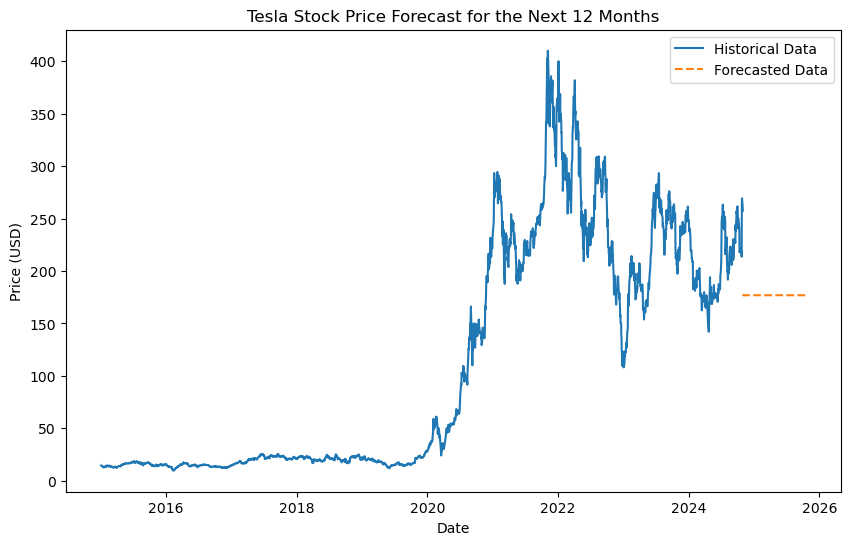

In [11]:
# Forecast for the next 6-12 months (assuming monthly data)
future_steps = 252  # For about 12 months (252 trading days)
future_forecast = model_fit.forecast(steps=future_steps)

# Visualize the forecast alongside historical data
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps, freq='B')
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Forecasted Data', linestyle='--')
plt.title('Tesla Stock Price Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Task 4: Optimize Portfolio Based on Forecast

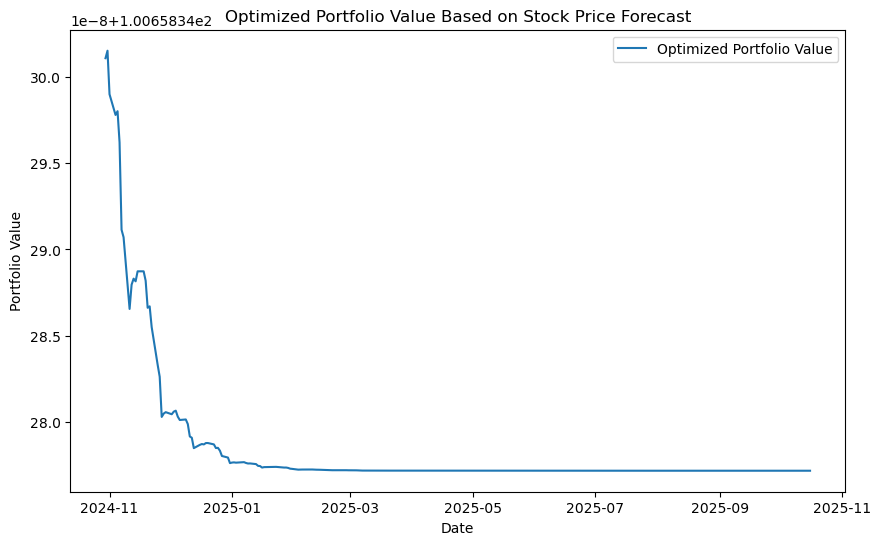

In [12]:
# Example: Optimizing portfolio based on predicted stock prices
# Let's assume we have some portfolio weights and forecasted returns

# Simulate portfolio value
portfolio_value = 10000  # Starting portfolio value
weights = [0.6, 0.4]  # Example: 60% in Tesla and 40% in another asset (e.g., bonds)

# Calculate portfolio return based on predicted stock prices
portfolio_return = forecast_auto[-future_steps:] * weights[0]  # Adjust based on asset weights

# Plot portfolio performance
plt.figure(figsize=(10,6))
plt.plot(future_dates, portfolio_return, label='Optimized Portfolio Value')
plt.title('Optimized Portfolio Value Based on Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()
